In [1]:
# for local use 

# import utilities (functions I created) 
import sys
sys.path.append("/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/utilities")
from Utils import *
from ATOMIC_Utils import *
from Gradient_LeastSquares import *

In [2]:
# import packages 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import sys
# sys.path.append("/home/mlb15109/Research/ATOMIC/github_repos/ATOMIC_MesoscaleFront/utilities")
# from Utils import *
# from ATOMIC_Utils import *
# from Gradient_LeastSquares import *
from scipy.stats import norm
import statistics

In [3]:
# distance function

def CalculateDistance(lon,lat):
    """
    Calculate along-track distance given
        an array of lon,lat.
    Return
        - along-track distance [km]
    """
    return np.hstack([0,np.cumsum(sw.dist(lon=lon,lat=lat,units='km')[0])])

In [4]:
# load SSS data 
ds_sss = xr.open_mfdataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/data/DataMackenzie/SMAP/*.nc4')
# crop lon to be consistent with other datasets 
ds_sss = ds_sss.sel(longitude=slice(-62,None))

In [5]:
coefs = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/coefs_diagnostics.nc')
coefs_nonadcp = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/coefs_nonadcp_diagnostics.nc')
adcp = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/adcp_reduced.nc')
nonadcp = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/nonadcp_5min_reduced.nc')


In [6]:
# need to drop nans in longitude in order to calculate distance correctly!! 
lon_nonan = adcp.longitude.dropna(dim='time')
adcp = adcp.sel(time=lon_nonan.time)

In [7]:
# calculate distance and add to dataset 

# distance calc for ds with saildrone dimension - wasn't working in loop above 
distance = CalculateDistance(lon = nonadcp.sel(saildrone='1060').longitude, lat = nonadcp.sel(saildrone='1060').latitude)
nonadcp['distance'] = ('time',distance)

# distance calc for ds with saildrone dimension - wasn't working in loop above 
distance = CalculateDistance(lon = adcp.sel(saildrone='1060').longitude, lat = adcp.sel(saildrone='1060').latitude)
adcp['distance'] = ('time',distance)

In [8]:
# calculate distance and add to dataset 
# distance calc for ds with saildrone dimension - wasn't working in loop above 
distance = CalculateDistance(lon = coefs.longitude, lat = coefs.latitude)
coefs['distance'] = ('time',distance)



In [9]:
# crop nonadcp dataset so distances match in each dataset 
# nonadcp_cropped = nonadcp.where((nonadcp.distance >= adcp.distance[0].data)& \
#                                        (nonadcp.distance <= adcp.distance[-1].data),
#                                        drop=True)

In [10]:
# crop nonadcp dataset so distances match in each dataset 
# nonadcp_cropped = nonadcp.where((nonadcp.distance >= coefs.distance[0].data)& \
#                                        (nonadcp.distance <= coefs.distance[-1].data),
#                                        drop=True)

In [11]:
nonadcp = nonadcp.reset_coords(['latitude','longitude'])

In [12]:
nonadcp = nonadcp.where(nonadcp.time == coefs.time,drop=True)

In [13]:
coefs = coefs.where(coefs.time == nonadcp.time, drop=True)

In [14]:
# nonadcp_cropped = nonadcp_cropped.where(nonadcp_cropped.time == coefs.time,drop=True)

In [15]:
# # crop nonadcp dataset so distances match in each dataset 
# nonadcp_cropped = nonadcp.where((nonadcp.distance >= coefs.distance[0].data)& \
#                                        (nonadcp.distance <= coefs.distance[-1].data),
#                                        drop=True)

In [16]:
plume = nonadcp.where(nonadcp.SAL_SBE37_MEAN < 35.1, drop=True)

In [22]:
nonplume = nonadcp.where(nonadcp.SAL_SBE37_MEAN > 36, drop=True)

In [23]:
coefs

<xarray.Dataset>
Dimensions:    (depth: 50, time: 5963)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-26T20:45:00 ... 2020-02-23T04:05:00
  * depth      (depth) float64 4.2 6.2 8.2 10.2 12.2 ... 96.2 98.2 100.2 102.2
    longitude  (time) float64 -51.38 -51.38 -51.38 ... -52.95 -52.95 -52.95
    latitude   (time) float64 7.502 7.502 7.503 7.503 ... 8.72 8.719 8.719 8.719
Data variables: (12/15)
    v_mean     (depth, time) float64 -0.1382 -0.1397 -0.1397 ... nan nan nan
    vx         (depth, time) float64 -9.824e-06 -8.066e-06 -5.77e-06 ... nan nan
    vy         (depth, time) float64 4.422e-06 3.172e-06 1.268e-06 ... nan nan
    u_mean     (depth, time) float64 -0.06367 -0.0596 -0.05717 ... nan nan nan
    ux         (depth, time) float64 -9.871e-07 1.211e-05 1.53e-05 ... nan nan
    uy         (depth, time) float64 6.375e-06 4.916e-06 4.451e-06 ... nan nan
    ...         ...
    distance   (time) float64 0.0 0.113 0.2197 ... 2.826e+03 2.826e+03 2.826e+03
    vort       (depth, time) float64 -0.8507 -0.6818 -0.5367 ... nan nan nan
    div        (depth, time) float64 0.1804 0.8026 0.8702 0.8702 ... nan nan nan
    strain     (depth, time) float64 0.3369 0.4978 0.7402 0.7402 ... nan nan nan
    w          (depth, time) float64 -0.0 -0.0 -0.0 -0.0 ... nan nan nan nan
    F          (depth, time) float64 -0.0001936 -0.0009333 -0.001455 ... nan nan

In [24]:
ds_sss

<xarray.Dataset>
Dimensions:               (time: 70, latitude: 720, longitude: 968)
Coordinates:
  * time                  (time) datetime64[ns] 2020-01-07T12:00:00 ... 2020-...
  * longitude             (longitude) float32 -61.88 -61.62 ... 179.6 179.9
  * latitude              (latitude) float32 89.88 89.62 89.38 ... -89.62 -89.88
Data variables:
    smap_sss_uncertainty  (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 552), meta=np.ndarray>
    smap_spd              (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 552), meta=np.ndarray>
    ice_fraction          (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 552), meta=np.ndarray>
    anc_sst               (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 552), meta=np.ndarray>
    weight                (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 552), meta=np.ndarray>
    land_fraction         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 552), meta=np.ndarray>
    smap_high_spd         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 552), meta=np.ndarray>
    smap_sss              (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 552), meta=np.ndarray>
    anc_sss               (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 552), meta=np.ndarray>
Attributes: (12/46)
    title:                               SMAP 0.25x0.25 deg grid averaged 8-d...
    institution:                         Jet Propulsion Laboratory
    source:                              SMAP L2B SSS
    history:                             2023-08-30 14:23:32 GMT hyrax-1.16.8...
    comment:                             Gaussian-weighted map gridding of SM...
    Gaussian_window_radius:              45.0
    ...                                  ...
    build_dmrpp_metadata.build_dmrpp:    3.20.9-91
    build_dmrpp_metadata.bes:            3.20.9-91
    build_dmrpp_metadata.libdap:         libdap-3.20.8-41
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    build_dmrpp_metadata.invocation:     build_dmrpp -c /tmp/conf_YiIB -f /tm...
    history_json:                        [{"$schema":"https:\/\/harmony.earth...

NameError: name 'nonadcp_cropped' is not defined

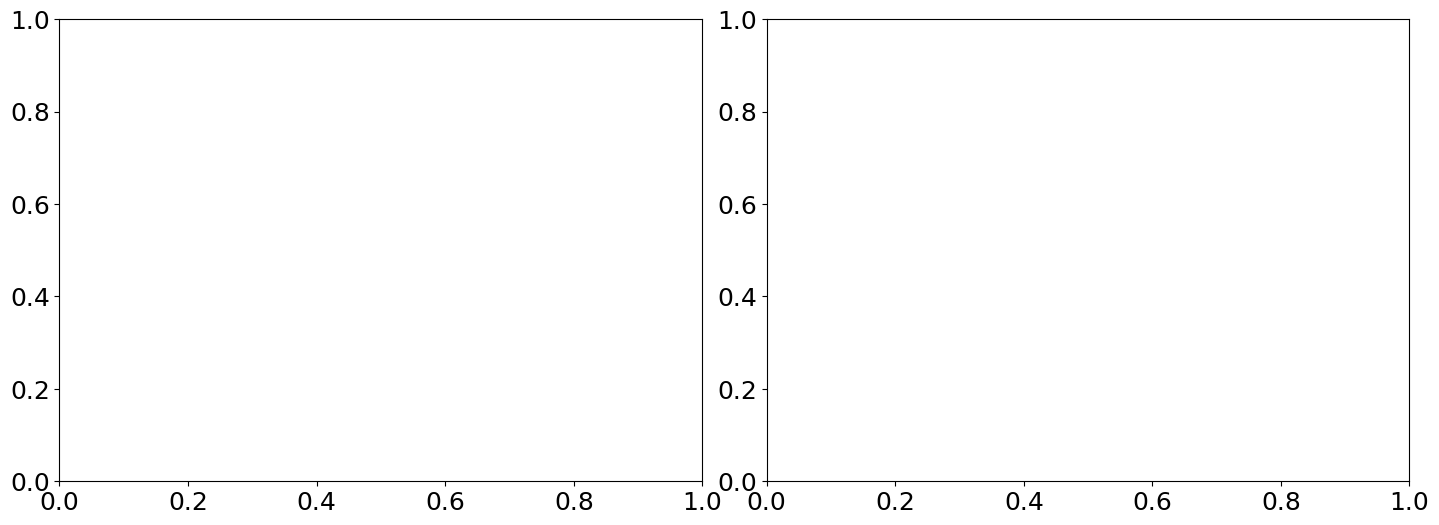

In [25]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,6))
# parameters 
var = "sigma0"
vmin = 21.5
vmax = 23.5
cmap = cmocean.cm.matter

fig.subplots_adjust(right=0.8,wspace=0.1)

# first subplot 
# plot saildrone tracks scattered by salinity
im = ax[0].scatter(nonadcp_cropped.sel(saildrone='1061').longitude,nonadcp_cropped.sel(saildrone='1060').latitude,
              c=nonadcp_cropped.sel(saildrone='1060')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
ax[0].scatter(nonadcp_cropped.sel(saildrone='1061').longitude,nonadcp_cropped.sel(saildrone='1061').latitude,
              c=nonadcp_cropped.sel(saildrone='1061')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
ax[0].scatter(nonadcp_cropped.sel(saildrone='1026').longitude,nonadcp_cropped.sel(saildrone='1026').latitude,
              c=nonadcp_cropped.sel(saildrone='1026')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)

# plt.colorbar(im,label=r'Potential Density [kg/$m^3$]')
cbar_ax = fig.add_axes([0.81, 0.15, 0.010, 0.7])
fig.colorbar(im, cax=cbar_ax,label=r'Potential Density [kg/$m^3$]')
# ax[0].scatter(subset_nonadcp.sel(saildrone='1060').longitude[::100],subset_nonadcp.sel(saildrone='1060').latitude[::100],
              # c=subset_nonadcp.sel(saildrone='1060')[var][::100],zorder=2,vmin=33.5,vmax=37.5,edgecolor='red',alpha=0.7)

# plot SMAP SSS data     
im1 = ds_sss.sel(time=('2020-02-18'),longitude=slice(-62,-48),latitude=slice(14,6)).smap_sss.plot(ax=ax[0],zorder=1,vmin=33,vmax=37,add_colorbar=False)

# plt.colorbar(im1,label='Sea Surface Salinity')
cbar_ax = fig.add_axes([0.88, 0.15, 0.010, 0.7])
fig.colorbar(im1, cax=cbar_ax,label='Sea Surface Salinity')
# plot AVISO SSH data 
# kw = {'levels':np.arange(-0.15,0.175,.025),'colors':'k'}
# ax[0].contour(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).sla,**kw,alpha=0.5)

ax[0].set_ylabel(r'Latitude [$^{\circ}N$]')
ax[0].set_xlabel(r'Latitude [$^{\circ}W$]')

# Second subplot
# plot saildrone tracks 
ax[1].scatter(plume.sel(saildrone='1061').longitude,plume.sel(saildrone='1060').latitude,
              c=plume.sel(saildrone='1060')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
    
# plot SSS data 
ds_sss.sel(time=('2020-02-18'),
           longitude=slice(-62,-48),
           latitude=slice(14,6)).smap_sss.plot(ax=ax[1],zorder=1,
                                               vmin=33,vmax=37,
                                               add_colorbar=False,
                                               label=None)

#plot SSH data 
# kw = {'levels':np.arange(-0.1+0.5,0.1+0.025+0.5,0.025),'colors':'k'}
# ax[1].contour(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).adt,**kw,alpha=0.5)

# # Quiver plots for SSS data and SD tracks 
# im0 = ax[1].quiver(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).ugos,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).vgos,scale=7)

# im = ax[1].quiver(subset_adcp.sel(saildrone='1060').longitude[::100],
#              subset_adcp.sel(saildrone='1060').latitude[::100],
#              subset_adcp.sel(saildrone='1060').isel(depth=0).u[::100],
#              subset_adcp.sel(saildrone='1060').isel(depth=0).v[::100],scale=7,zorder=10,color='snow')

# ax[1].quiverkey(im0, 0.505, 0.15, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_xlabel('')

# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/Satellite_SDtracks_afterplume.jpeg',
#             dpi=200,bbox_inches='tight')

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/thesis_figs/CaseStudySpatial.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)
            


Text(0.5, 0, '')

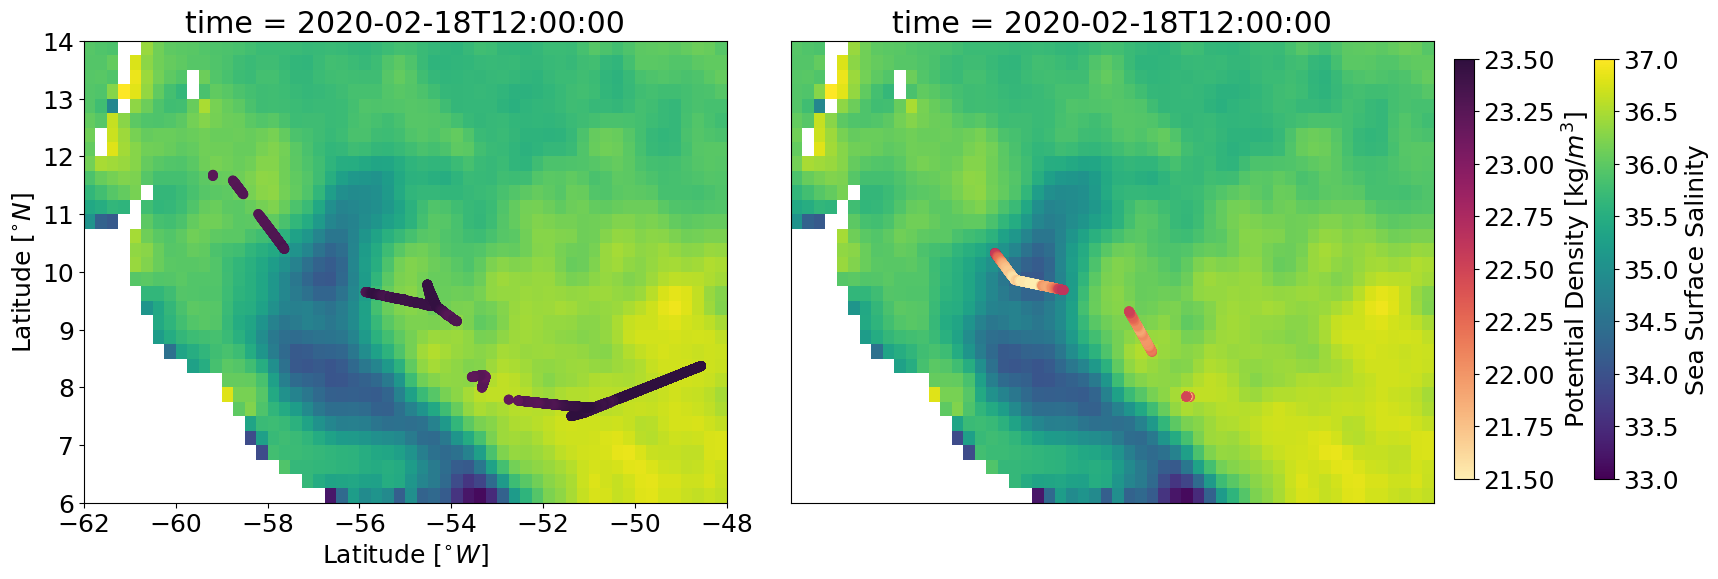

In [26]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,6))
# parameters 
var = "sigma0"
vmin = 21.5
vmax = 23.5
cmap = cmocean.cm.matter

fig.subplots_adjust(right=0.8,wspace=0.1)

# first subplot 
# plot saildrone tracks scattered by salinity
im = ax[0].scatter(nonplume.sel(saildrone='1060').longitude,nonplume.sel(saildrone='1060').latitude,
              c=nonplume.sel(saildrone='1060')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
ax[0].scatter(nonplume.sel(saildrone='1061').longitude,nonplume.sel(saildrone='1061').latitude,
              c=nonplume.sel(saildrone='1061')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
ax[0].scatter(nonplume.sel(saildrone='1026').longitude,nonplume.sel(saildrone='1026').latitude,
              c=nonplume.sel(saildrone='1026')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)

# plt.colorbar(im,label=r'Potential Density [kg/$m^3$]')
cbar_ax = fig.add_axes([0.81, 0.15, 0.010, 0.7])
fig.colorbar(im, cax=cbar_ax,label=r'Potential Density [kg/$m^3$]')
# ax[0].scatter(subset_nonadcp.sel(saildrone='1060').longitude[::100],subset_nonadcp.sel(saildrone='1060').latitude[::100],
              # c=subset_nonadcp.sel(saildrone='1060')[var][::100],zorder=2,vmin=33.5,vmax=37.5,edgecolor='red',alpha=0.7)

# plot SMAP SSS data     
im1 = ds_sss.sel(time=('2020-02-18'),longitude=slice(-62,-48),latitude=slice(14,6)).smap_sss.plot(ax=ax[0],zorder=1,vmin=33,vmax=37,add_colorbar=False)

# plt.colorbar(im1,label='Sea Surface Salinity')
cbar_ax = fig.add_axes([0.88, 0.15, 0.010, 0.7])
fig.colorbar(im1, cax=cbar_ax,label='Sea Surface Salinity')
# plot AVISO SSH data 
# kw = {'levels':np.arange(-0.15,0.175,.025),'colors':'k'}
# ax[0].contour(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).sla,**kw,alpha=0.5)

ax[0].set_ylabel(r'Latitude [$^{\circ}N$]')
ax[0].set_xlabel(r'Latitude [$^{\circ}W$]')

# Second subplot
# plot saildrone tracks 
ax[1].scatter(plume.sel(saildrone='1060').longitude,plume.sel(saildrone='1060').latitude,
              c=plume.sel(saildrone='1060')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)

ax[1].scatter(plume.sel(saildrone='1061').longitude,plume.sel(saildrone='1061').latitude,
              c=plume.sel(saildrone='1061')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)

ax[1].scatter(plume.sel(saildrone='1026').longitude,plume.sel(saildrone='1026').latitude,
              c=plume.sel(saildrone='1026')[var],zorder=2,vmin=vmin,vmax=vmax,cmap=cmap)
    
# plot SSS data 
ds_sss.sel(time=('2020-02-18'),
           longitude=slice(-62,-48),
           latitude=slice(14,6)).smap_sss.plot(ax=ax[1],zorder=1,
                                               vmin=33,vmax=37,
                                               add_colorbar=False,
                                               label=None)

#plot SSH data 
# kw = {'levels':np.arange(-0.1+0.5,0.1+0.025+0.5,0.025),'colors':'k'}
# ax[1].contour(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).adt,**kw,alpha=0.5)

# # Quiver plots for SSS data and SD tracks 
# im0 = ax[1].quiver(ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).longitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).latitude,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).ugos,
#              ds_ssh.sel(time='2020-02-18',longitude=slice(-62,-52),latitude=slice(8,14)).vgos,scale=7)

# im = ax[1].quiver(subset_adcp.sel(saildrone='1060').longitude[::100],
#              subset_adcp.sel(saildrone='1060').latitude[::100],
#              subset_adcp.sel(saildrone='1060').isel(depth=0).u[::100],
#              subset_adcp.sel(saildrone='1060').isel(depth=0).v[::100],scale=7,zorder=10,color='snow')

# ax[1].quiverkey(im0, 0.505, 0.15, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_xlabel('')

# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/Satellite_SDtracks_afterplume.jpeg',
#             dpi=200,bbox_inches='tight')

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/thesis_figs/CaseStudySpatial.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)
            


In [27]:
time_nonplume = nonplume.time

In [28]:
time_nonplume

<xarray.DataArray 'time' (time: 3476)>
array(['2020-01-26T20:45:00.000000000', '2020-01-26T20:50:00.000000000',
       '2020-01-26T20:55:00.000000000', ..., '2020-02-22T01:05:00.000000000',
       '2020-02-22T01:10:00.000000000', '2020-02-22T01:15:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    latitude   (time) float64 7.502 7.502 7.503 7.503 ... 9.146 9.146 9.145
    longitude  (time) float64 -51.38 -51.38 -51.38 ... -53.88 -53.87 -53.87
  * time       (time) datetime64[ns] 2020-01-26T20:45:00 ... 2020-02-22T01:15:00
Attributes:
    standard_name:  time
    long_name:      time in seconds
    axis:           T

In [29]:
time_plume = plume.time 

In [30]:
time_plume

<xarray.DataArray 'time' (time: 917)>
array(['2020-02-04T22:20:00.000000000', '2020-02-04T22:25:00.000000000',
       '2020-02-04T22:30:00.000000000', ..., '2020-02-19T01:15:00.000000000',
       '2020-02-19T01:20:00.000000000', '2020-02-19T01:25:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    latitude   (time) float64 7.836 7.837 7.837 7.838 ... 9.686 9.685 9.685
    longitude  (time) float64 -53.31 -53.32 -53.32 ... -56.07 -56.06 -56.06
  * time       (time) datetime64[ns] 2020-02-04T22:20:00 ... 2020-02-19T01:25:00
Attributes:
    standard_name:  time
    long_name:      time in seconds
    axis:           T

In [31]:
coefs_plume = coefs.sel(time=time_plume)

In [32]:
coefs_nonplume = coefs.sel(time=time_nonplume)

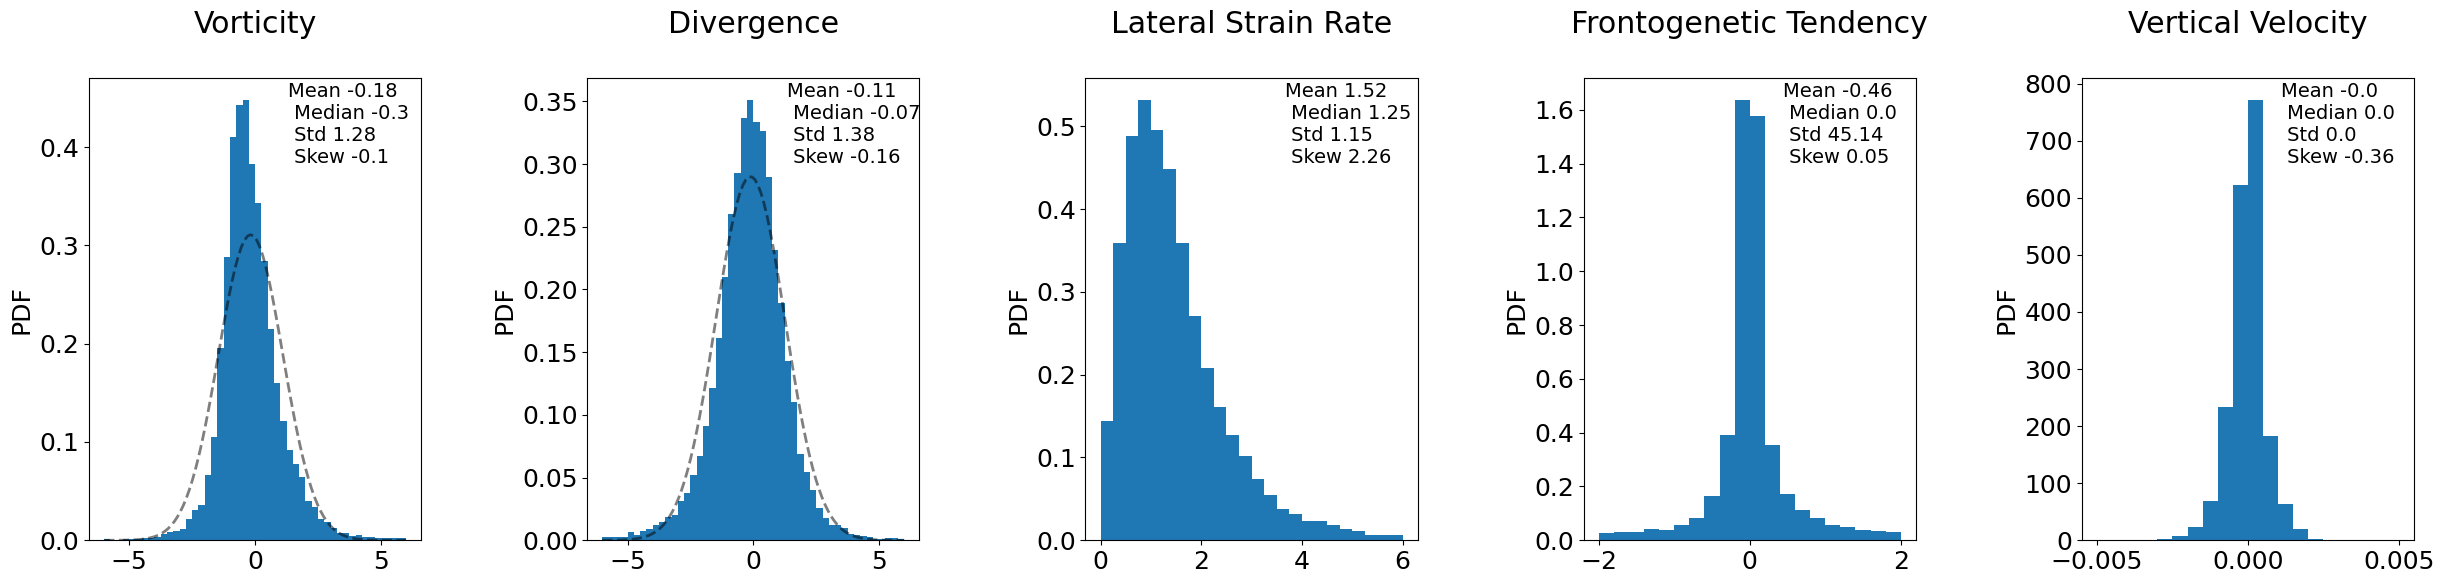

In [33]:
subset = coefs_plume.isel(depth=slice(0,24))

plt.rcParams.update({'font.size': 18})

dbins, bmin, bmax = 0.25, -6, 6
fig = plt.figure(figsize=(30,6))
ax0 = fig.add_subplot(151)
ax1 = fig.add_subplot(152)
ax2 = fig.add_subplot(153)
ax3 = fig.add_subplot(154)
ax4 = fig.add_subplot(155)

img0 = ax0.hist(subset.vort.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

# plot normal distribution on top 
x = np.linspace(bmin, bmax, 100)
mu = np.nanmean(subset.vort.values.flatten())
std = np.nanstd(subset.vort.values.flatten())
p = norm.pdf(x, mu, std) 
ax0.plot(x, p, 'k', linewidth=2, linestyle='dashed',alpha=0.5,label='Gaussian')
# ax0.legend()

img1 = ax1.hist(subset.div.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

# plot normal distribution on top 
x = np.linspace(bmin, bmax, 100)
mu = np.nanmean(subset.div.values.flatten())
std = np.nanstd(subset.div.values.flatten())
p = norm.pdf(x, mu, std) 
ax1.plot(x, p, 'k', linewidth=2, linestyle='dashed',alpha=0.5,label='Gaussian')
# ax1.legend()


img2 = ax2.hist(subset.strain.values.flatten(),density=True,bins=np.arange(0,bmax+dbins,dbins))

# plot normal distribution on top 
# x = np.linspace(0, bmax, 100)
# # mu = np.nanmean(coefs.strain.values.flatten())
# # std = np.nanstd(coefs.strain.values.flatten())
# # # Plot the theoretical density of f
# # x = np.arange(0, 30, .05)
# ax2.plot(x, stats.chi2.pdf(x, df=3), color='r', lw=2)
# # plt.show()
# # p = norm.pdf(x, mu, std) 
# # ax2.plot(x, p, 'k', linewidth=2, linestyle='dashed',alpha=0.5,label='Gaussian')
# # # ax2.legend()

bmin = -2
bmax = 2
dbins = 0.2

img3 = ax3.hist(subset.F.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

bmin = -0.005
bmax = 0.005
dbins = 0.0005

img4 = ax4.hist(subset.w.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

ax0.set_title('Vorticity',y=1.08)
ax0.set_ylabel('PDF')
ax1.set_title('Divergence',y=1.08)
ax1.set_ylabel('PDF')
ax2.set_title('Lateral Strain Rate',y=1.08)
ax2.set_ylabel('PDF')
ax3.set_title('Frontogenetic Tendency',y=1.08)
ax3.set_ylabel('PDF')
ax4.set_title('Vertical Velocity',y=1.08)
ax4.set_ylabel('PDF')
plt.subplots_adjust(wspace=0.5)
        
for ax,var in zip([ax0, 
                   ax1, 
                   ax2,
                   ax3,
                   ax4],
                  [subset.vort.values.flatten(),
                   subset.div.values.flatten(),
                   subset.strain.values.flatten(),
                   subset.F.values.flatten(),
                   subset.w.values.flatten()]):
        ax.text(.6,0.9,
                (f'Mean {get_stats(var)[0]} \n Median {get_stats(var)[1]} \n Std {get_stats(var)[2]} \n Skew {get_stats(var)[3]}'.format()),
        ha='left',va='center',transform=ax.transAxes,fontsize=14)

# plt.savefig('/home/mlb15109/Research/ATOMIC/figures/gradientcalc_sensitivity/RD5_Int10_k2.jpeg',dpi=200,bbox_inches='tight')
# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/PDFs_front1.jpeg',
#             dpi=200,bbox_inches='tight')

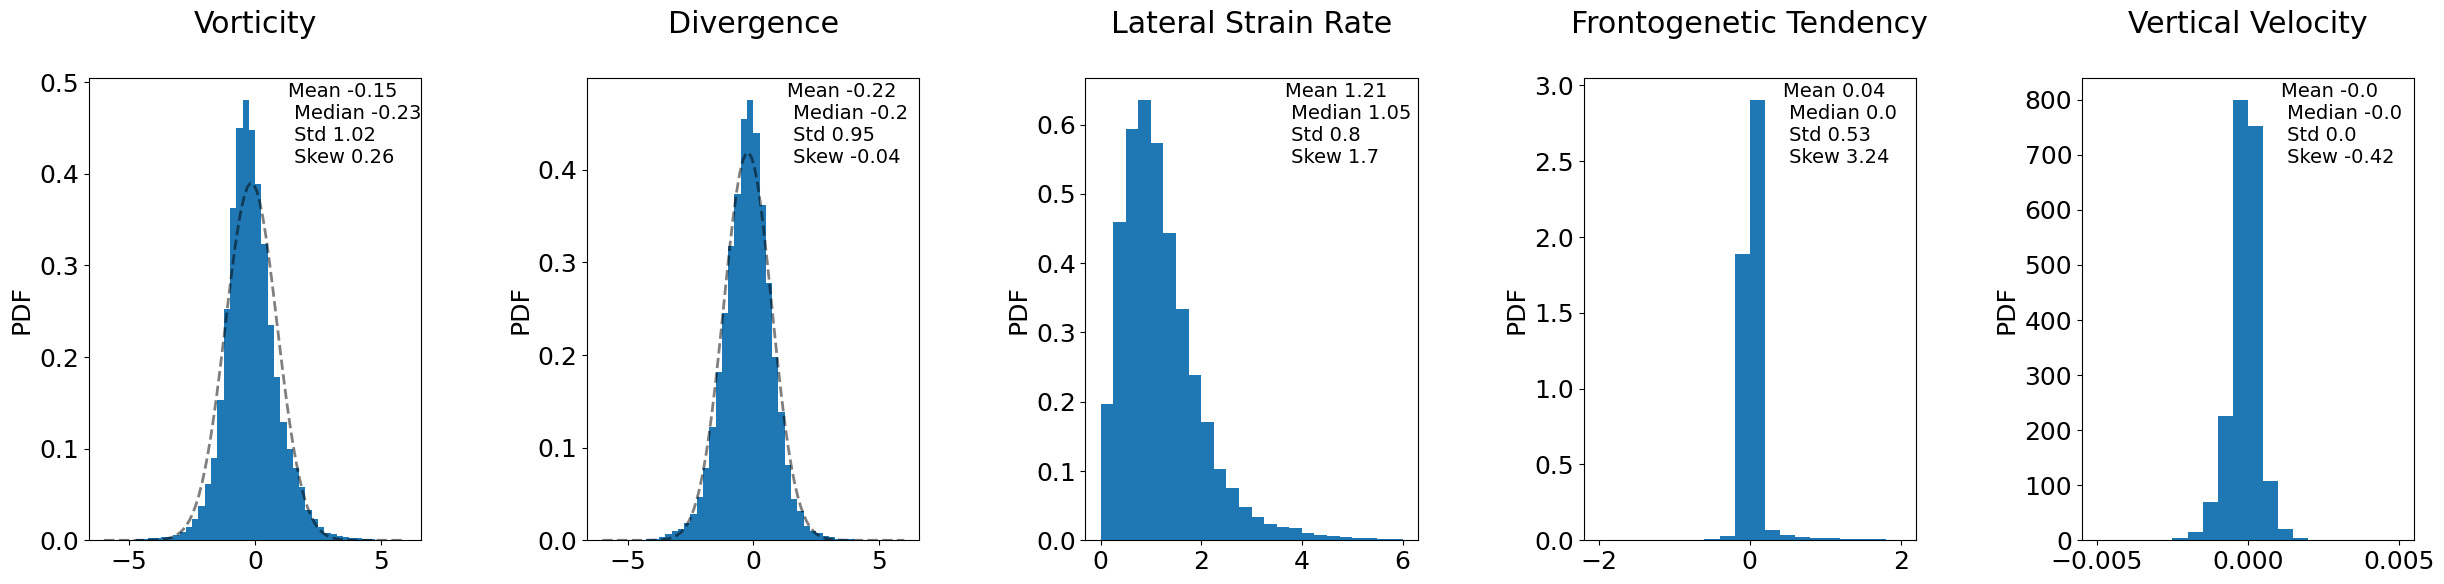

In [34]:
subset = coefs_nonplume.isel(depth=slice(0,24))

plt.rcParams.update({'font.size': 18})

dbins, bmin, bmax = 0.25, -6, 6
fig = plt.figure(figsize=(30,6))
ax0 = fig.add_subplot(151)
ax1 = fig.add_subplot(152)
ax2 = fig.add_subplot(153)
ax3 = fig.add_subplot(154)
ax4 = fig.add_subplot(155)

img0 = ax0.hist(subset.vort.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

# plot normal distribution on top 
x = np.linspace(bmin, bmax, 100)
mu = np.nanmean(subset.vort.values.flatten())
std = np.nanstd(subset.vort.values.flatten())
p = norm.pdf(x, mu, std) 
ax0.plot(x, p, 'k', linewidth=2, linestyle='dashed',alpha=0.5,label='Gaussian')
# ax0.legend()

img1 = ax1.hist(subset.div.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

# plot normal distribution on top 
x = np.linspace(bmin, bmax, 100)
mu = np.nanmean(subset.div.values.flatten())
std = np.nanstd(subset.div.values.flatten())
p = norm.pdf(x, mu, std) 
ax1.plot(x, p, 'k', linewidth=2, linestyle='dashed',alpha=0.5,label='Gaussian')
# ax1.legend()


img2 = ax2.hist(subset.strain.values.flatten(),density=True,bins=np.arange(0,bmax+dbins,dbins))

# plot normal distribution on top 
# x = np.linspace(0, bmax, 100)
# # mu = np.nanmean(coefs.strain.values.flatten())
# # std = np.nanstd(coefs.strain.values.flatten())
# # # Plot the theoretical density of f
# # x = np.arange(0, 30, .05)
# ax2.plot(x, stats.chi2.pdf(x, df=3), color='r', lw=2)
# # plt.show()
# # p = norm.pdf(x, mu, std) 
# # ax2.plot(x, p, 'k', linewidth=2, linestyle='dashed',alpha=0.5,label='Gaussian')
# # # ax2.legend()

bmin = -2
bmax = 2
dbins = 0.2

img3 = ax3.hist(subset.F.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

bmin = -0.005
bmax = 0.005
dbins = 0.0005

img4 = ax4.hist(subset.w.values.flatten(),density=True,bins=np.arange(bmin,bmax+dbins,dbins))

ax0.set_title('Vorticity',y=1.08)
ax0.set_ylabel('PDF')
ax1.set_title('Divergence',y=1.08)
ax1.set_ylabel('PDF')
ax2.set_title('Lateral Strain Rate',y=1.08)
ax2.set_ylabel('PDF')
ax3.set_title('Frontogenetic Tendency',y=1.08)
ax3.set_ylabel('PDF')
ax4.set_title('Vertical Velocity',y=1.08)
ax4.set_ylabel('PDF')
plt.subplots_adjust(wspace=0.5)
        
for ax,var in zip([ax0, 
                   ax1, 
                   ax2,
                   ax3,
                   ax4],
                  [subset.vort.values.flatten(),
                   subset.div.values.flatten(),
                   subset.strain.values.flatten(),
                   subset.F.values.flatten(),
                   subset.w.values.flatten()]):
        ax.text(.6,0.9,
                (f'Mean {get_stats(var)[0]} \n Median {get_stats(var)[1]} \n Std {get_stats(var)[2]} \n Skew {get_stats(var)[3]}'.format()),
        ha='left',va='center',transform=ax.transAxes,fontsize=14)

# plt.savefig('/home/mlb15109/Research/ATOMIC/figures/gradientcalc_sensitivity/RD5_Int10_k2.jpeg',dpi=200,bbox_inches='tight')
# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/PDFs_front1.jpeg',
#             dpi=200,bbox_inches='tight')

In [35]:
import matplotlib as mpl

/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_41995/730770850.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax[0].hist2d(subset.vort.values.flatten(),subset.div.values.flatten(),bins=[binsx,binsy],density=True,cmap=cmocean.cm.dense,
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_41995/730770850.py:22: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax[1].hist2d(subset.vort.values.flatten(),subset.strain.values.flatten(),bins=[binsx,bins_s],density=True,cmap=cmocean.cm.dense,


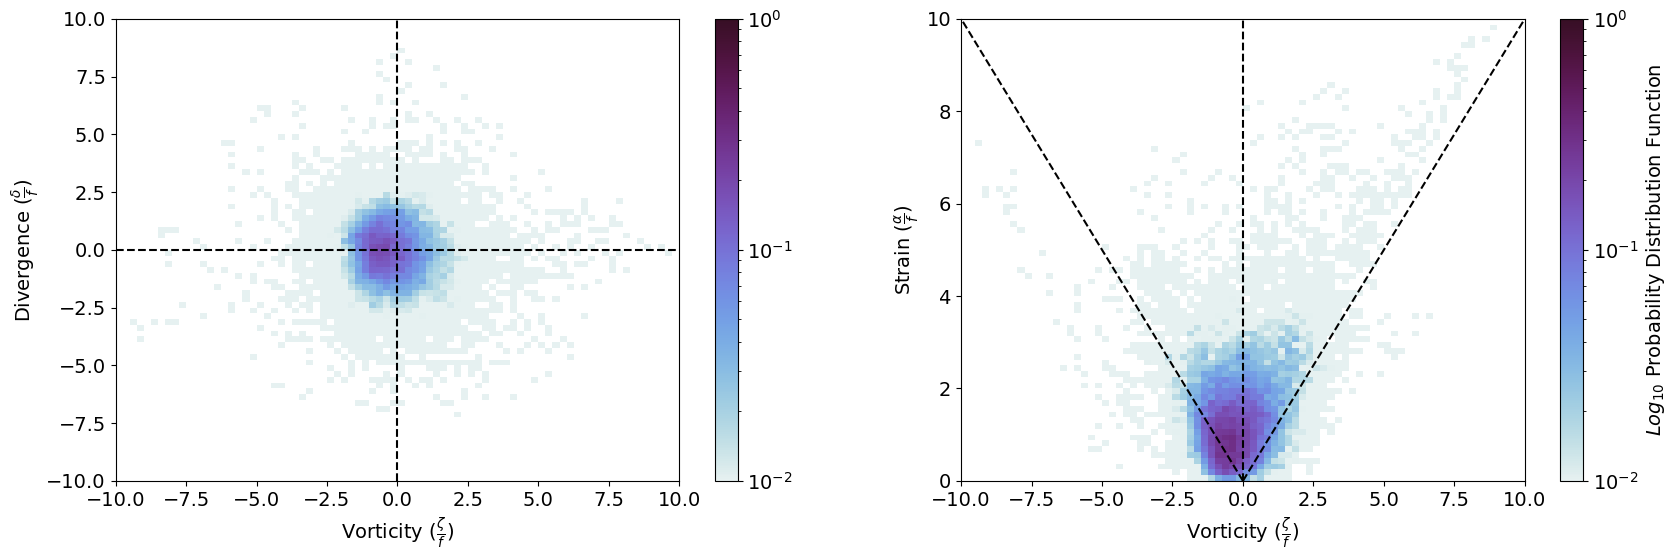

In [36]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
# my_cmap = cmap = plt.cm.get_cmap("Spectral_r").copy()
# my_cmap.set_under('w',0.001)
dbins, bmin, bmax = 0.25, -10, 10
subset = coefs_plume.isel(depth=slice(0,24))
binsx=np.arange(bmin,bmax+dbins,dbins)
binsy=np.arange(bmin,bmax+dbins,dbins)
bins_s=np.arange(0,bmax+dbins/2,dbins/2)
ax[0].hist2d(subset.vort.values.flatten(),subset.div.values.flatten(),bins=[binsx,binsy],density=True,cmap=cmocean.cm.dense,
          norm=mpl.colors.LogNorm(),vmin=10e-3,vmax=10e-1)
# ax.set_facecolor("white")
# cbar_ax = fig.add_axes([0.94, 0.14, 0.010, 0.3])
# plt.colorbar(im[3],ax=ax[0])
# ax.set_facecolor("white")
ax[0].plot([bmin,bmax],[0,0],'--',color='k')
ax[0].plot([0,0],[bmin,bmax],'--',color='k')
ax[0].set_xlabel(r'Vorticity $(\frac{\zeta}{f})$')
ax[0].set_ylabel(r'Divergence $(\frac{\delta}{f})$')


im = ax[1].hist2d(subset.vort.values.flatten(),subset.strain.values.flatten(),bins=[binsx,bins_s],density=True,cmap=cmocean.cm.dense,
          norm=mpl.colors.LogNorm(),vmin=10e-3,vmax=10e-1)

# plot 1:1 lines 
x = subset.vort
y = subset.strain
ax[1].plot([0, bmax], [0, bmax], 'k',linestyle='dashed')
ax[1].plot([0, bmin], [0, -bmin], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[1].vlines(x=0,ymax=y.max(),ymin=0,color='k',linestyle='dashed')

ax[1].set_xlabel(r'Vorticity $(\frac{\zeta}{f})$')
ax[1].set_ylabel(r'Strain $(\frac{\alpha}{f})$')
plt.colorbar(im[3],label=r'$Log_{10}$ Probability Distribution Function',ax=ax[1])
plt.colorbar(im[3],ax=ax[0])

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/JPDF.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_41995/2952886133.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax[0].hist2d(subset.vort.values.flatten(),subset.div.values.flatten(),bins=[binsx,binsy],density=True,cmap=cmocean.cm.dense,
/var/folders/yh/gzfzh54j7n572slt5126rl3m0000gn/T/ipykernel_41995/2952886133.py:22: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax[1].hist2d(subset.vort.values.flatten(),subset.strain.values.flatten(),bins=[binsx,bins_s],density=True,cmap=cmocean.cm.dense,


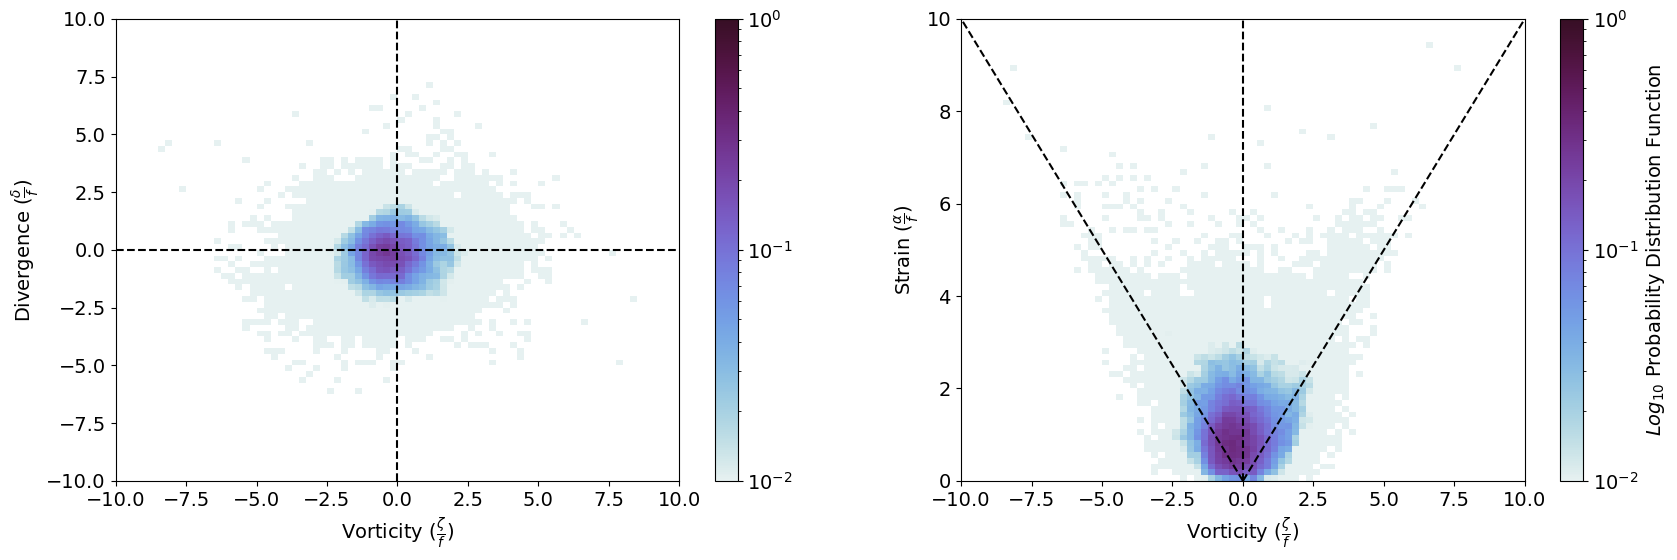

In [37]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
# my_cmap = cmap = plt.cm.get_cmap("Spectral_r").copy()
# my_cmap.set_under('w',0.001)
dbins, bmin, bmax = 0.25, -10, 10
subset = coefs_nonplume.isel(depth=slice(0,24))
binsx=np.arange(bmin,bmax+dbins,dbins)
binsy=np.arange(bmin,bmax+dbins,dbins)
bins_s=np.arange(0,bmax+dbins/2,dbins/2)
ax[0].hist2d(subset.vort.values.flatten(),subset.div.values.flatten(),bins=[binsx,binsy],density=True,cmap=cmocean.cm.dense,
          norm=mpl.colors.LogNorm(),vmin=10e-3,vmax=10e-1)
# ax.set_facecolor("white")
# cbar_ax = fig.add_axes([0.94, 0.14, 0.010, 0.3])
# plt.colorbar(im[3],ax=ax[0])
# ax.set_facecolor("white")
ax[0].plot([bmin,bmax],[0,0],'--',color='k')
ax[0].plot([0,0],[bmin,bmax],'--',color='k')
ax[0].set_xlabel(r'Vorticity $(\frac{\zeta}{f})$')
ax[0].set_ylabel(r'Divergence $(\frac{\delta}{f})$')


im = ax[1].hist2d(subset.vort.values.flatten(),subset.strain.values.flatten(),bins=[binsx,bins_s],density=True,cmap=cmocean.cm.dense,
          norm=mpl.colors.LogNorm(),vmin=10e-3,vmax=10e-1)

# plot 1:1 lines 
x = subset.vort
y = subset.strain
ax[1].plot([0, bmax], [0, bmax], 'k',linestyle='dashed')
ax[1].plot([0, bmin], [0, -bmin], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[1].vlines(x=0,ymax=y.max(),ymin=0,color='k',linestyle='dashed')

ax[1].set_xlabel(r'Vorticity $(\frac{\zeta}{f})$')
ax[1].set_ylabel(r'Strain $(\frac{\alpha}{f})$')
plt.colorbar(im[3],label=r'$Log_{10}$ Probability Distribution Function',ax=ax[1])
plt.colorbar(im[3],ax=ax[0])

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/JPDF.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

In [42]:
coefs

<xarray.Dataset>
Dimensions:    (depth: 50, time: 5963)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-26T20:45:00 ... 2020-02-23T04:05:00
  * depth      (depth) float64 4.2 6.2 8.2 10.2 12.2 ... 96.2 98.2 100.2 102.2
    longitude  (time) float64 -51.38 -51.38 -51.38 ... -52.95 -52.95 -52.95
    latitude   (time) float64 7.502 7.502 7.503 7.503 ... 8.72 8.719 8.719 8.719
Data variables: (12/15)
    v_mean     (depth, time) float64 -0.1382 -0.1397 -0.1397 ... nan nan nan
    vx         (depth, time) float64 -9.824e-06 -8.066e-06 -5.77e-06 ... nan nan
    vy         (depth, time) float64 4.422e-06 3.172e-06 1.268e-06 ... nan nan
    u_mean     (depth, time) float64 -0.06367 -0.0596 -0.05717 ... nan nan nan
    ux         (depth, time) float64 -9.871e-07 1.211e-05 1.53e-05 ... nan nan
    uy         (depth, time) float64 6.375e-06 4.916e-06 4.451e-06 ... nan nan
    ...         ...
    distance   (time) float64 0.0 0.113 0.2197 ... 2.826e+03 2.826e+03 2.826e+03
    vort       (depth, time) float64 -0.8507 -0.6818 -0.5367 ... nan nan nan
    div        (depth, time) float64 0.1804 0.8026 0.8702 0.8702 ... nan nan nan
    strain     (depth, time) float64 0.3369 0.4978 0.7402 0.7402 ... nan nan nan
    w          (depth, time) float64 -0.0 -0.0 -0.0 -0.0 ... nan nan nan nan
    F          (depth, time) float64 -0.0001936 -0.0009333 -0.001455 ... nan nan

(-100.0, 100.0)

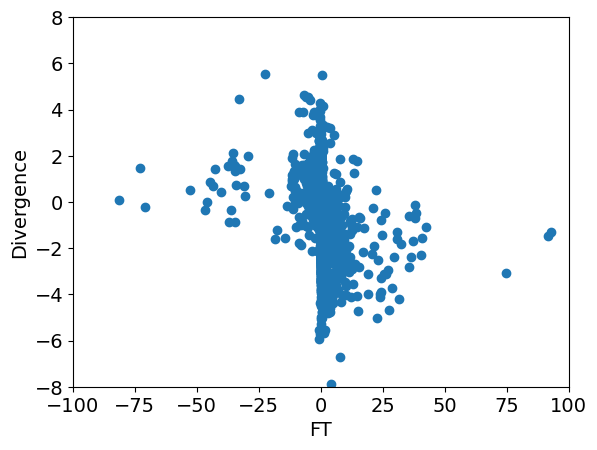

In [46]:
plt.scatter(coefs.F.isel(depth=0),coefs.div.isel(depth=0))
plt.ylabel('Divergence')
plt.xlabel('FT')
plt.ylim(-8,8)
plt.xlim(-100,100)

In [39]:
import scipy 

In [42]:
scipy.stats.ttest_ind(a=coefs_plume.isel(depth=slice(0,24)).div.values.flatten(),b=coefs_nonplume.isel(depth=slice(0,24)).div.values.flatten(),nan_policy='omit')

TtestResult(statistic=13.56365340699121, pvalue=7.134568355715412e-42, df=105118.0)